# EDA: Craigslist Cars and Trucks Dataset

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('../airflow/data/vehicles.csv')

# Basic preview
df.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:

# Dataset info and summary
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:

# Check for missing values
df.isnull().sum().sort_values(ascending=False)


county          426880
size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
lat               6549
long              6549
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
description         70
posting_date        68
image_url           68
region_url           0
url                  0
id                   0
region               0
price                0
state                0
dtype: int64

In [7]:

# Drop columns with more than 50% missing values (optional)
null_thresh = 0.5
df = df[df.columns[df.isnull().mean() < null_thresh]]


In [8]:

# Drop duplicate rows
df.drop_duplicates(inplace=True)


In [34]:
df = df[df['price']< 3*(10**5)] 

In [41]:
p90 = df['price'].quantile(0.90)
clip_price = df['price'].clip(upper=p90)

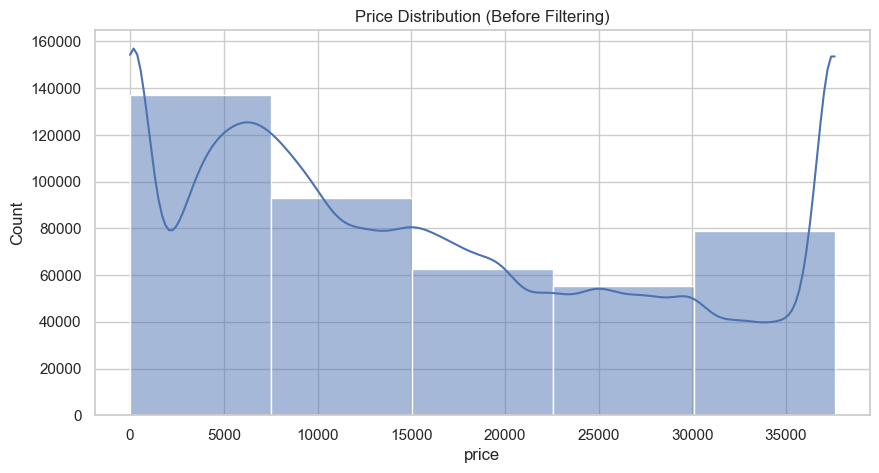

In [44]:

# Price distribution before filtering
plt.figure(figsize=(10, 5))
sns.histplot(clip_price, bins=5, kde=True)
plt.title('Price Distribution (Before Filtering)')
## plt.xlim(0, 1000000)
plt.show()


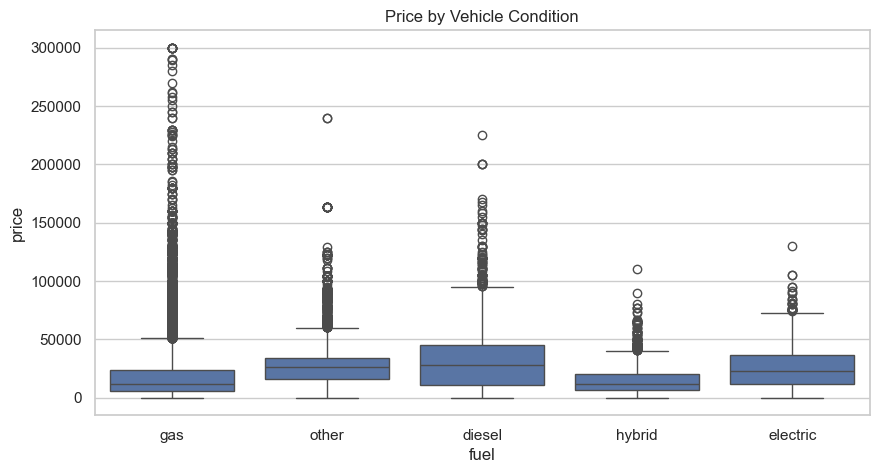

In [55]:

# Boxplot of price by condition
plt.figure(figsize=(10, 5))
sns.boxplot(x="fuel", y='price', data=df)
plt.title('Price by Vehicle Condition')
plt.show()


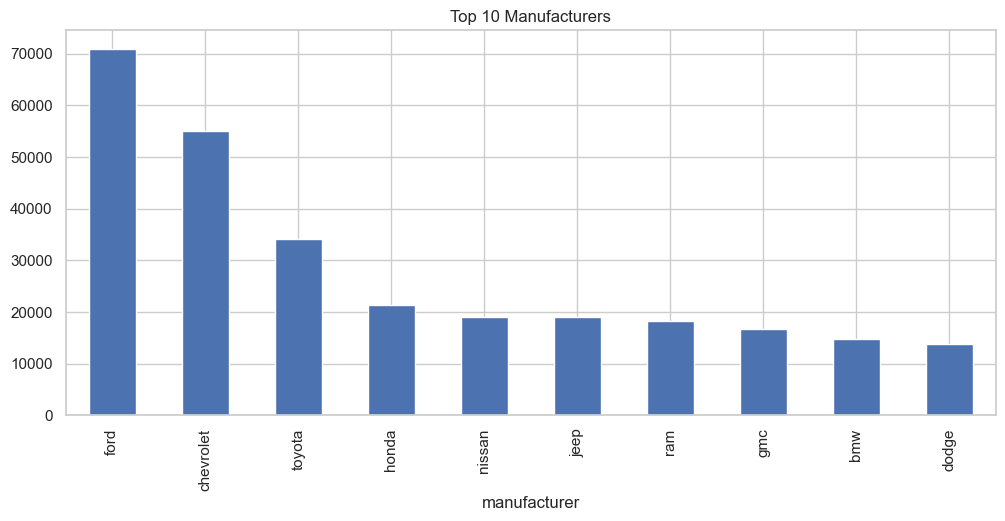

In [46]:

# Top 10 manufacturers by frequency
plt.figure(figsize=(12, 5))
df['manufacturer'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Manufacturers')
plt.show()


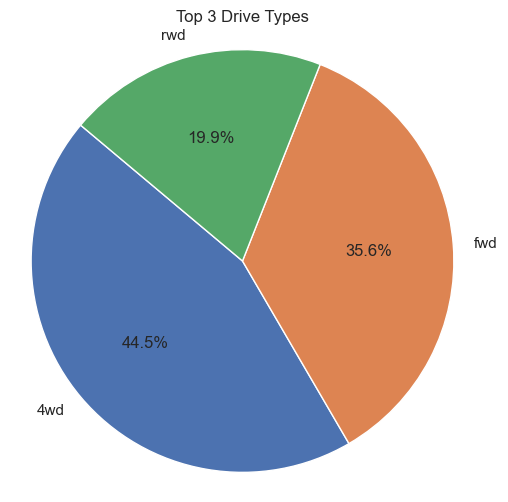

In [70]:

top3_drive = df['drive'].value_counts().nlargest(3)

# พล็อต pie chart
plt.figure(figsize=(6, 6))
plt.pie(top3_drive, labels=top3_drive.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Drive Types')
plt.axis('equal')  # ให้วงกลมสมส่วน
plt.show()

<Axes: xlabel='odometer_clipped', ylabel='price'>

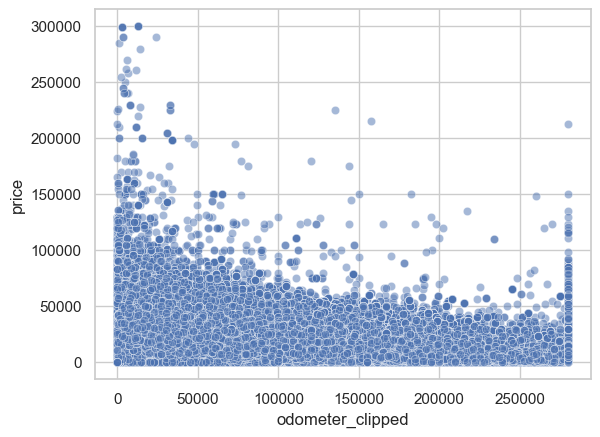

In [77]:
import matplotlib.ticker as ticker
p99 = df['odometer'].quantile(0.99)
df['odometer_clipped'] = df['odometer'].clip(upper=p99)

sns.scatterplot(data=df, x='odometer_clipped', y='price', alpha=0.5)


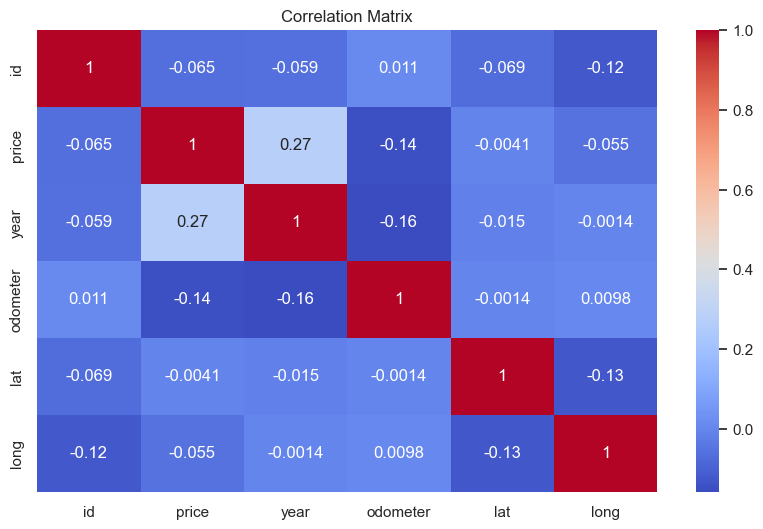

In [64]:

# Correlation heatmap
num_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
